In [1]:
!pip install geopy

In [0]:
from geopy.geocoders import Bing
geocoder = Bing(
            api_key='Apte-9V4eWWA69AIOVbWg0d5KPqpkBTjRBnYaqUW4LJUtONmAMM6FbM0HJbrwF4W',
            user_agent='my_user_agent/1.0'
        )

In [0]:
import pandas as pd

In [5]:
employeeAdd = pd.read_csv('Employee_Addresses.csv')
employeeAdd.head()

address  employee_id
0   98 Edinburgh St, San Francisco, CA 94112, USA          206
1        237 Accacia St, Daly City, CA 94014, USA         2081
2    1835 Folsom St, San Francisco, CA 94103, USA          178
3  170 Cambridge St, San Francisco, CA 94134, USA           50
4     16 Roanoke St, San Francisco, CA 94131, USA         1863

In [10]:
employeeArray = []
for i in range(0,employeeAdd.shape[0]):
  coo= list(geocoder.geocode(employeeAdd.address[i])[1])
  print(coo)
  employeeArray.append(coo)
employeeArray

[37.7275910524263, -122.427241333456]
[37.70418, -122.41582]
[37.76793, -122.4151]
[37.72966, -122.41972]
[37.73624, -122.43132]
[37.70735, -122.4472]
[37.7793482880358, -122.415102955332]
[37.70679, -122.41357]
[37.77915, -122.4158]
[37.73345, -122.42299]
[37.76849, -122.43092]
[37.76582, -122.4092]
[37.70382, -122.41466]
[37.73701, -122.40085]
[37.72134, -122.42941]
[37.7061, -122.45062]
[37.71931, -122.4285]
[37.79508, -122.44045]
[37.71611, -122.43771]
[37.71038, -122.41127]
[37.78338, -122.39571]
[37.7714, -122.41494]
[37.7267907519398, -122.430019621436]
[37.73512, -122.40496]
[37.73829, -122.43042]
[37.7034335621398, -122.41446096696]
[37.74268, -122.42193]
[37.79635, -122.43922]
[37.71694, -122.40854]
[37.77102, -122.40731]
[37.71466, -122.43645]
[37.71974, -122.44318]
[37.76383, -122.41681]
[37.7262, -122.43007]
[37.71396, -122.43953]
[37.79587, -122.44344]
[37.729, -122.42217]
[37.73551, -122.42038]
[37.7060792029188, -122.412306573451]
[37.7948862070388, -122.438237703256]
[

[[37.7275910524263, -122.427241333456],
 [37.70418, -122.41582],
 [37.76793, -122.4151],
 [37.72966, -122.41972],
 [37.73624, -122.43132],
 [37.70735, -122.4472],
 [37.7793482880358, -122.415102955332],
 [37.70679, -122.41357],
 [37.77915, -122.4158],
 [37.73345, -122.42299],
 [37.76849, -122.43092],
 [37.76582, -122.4092],
 [37.70382, -122.41466],
 [37.73701, -122.40085],
 [37.72134, -122.42941],
 [37.7061, -122.45062],
 [37.71931, -122.4285],
 [37.79508, -122.44045],
 [37.71611, -122.43771],
 [37.71038, -122.41127],
 [37.78338, -122.39571],
 [37.7714, -122.41494],
 [37.7267907519398, -122.430019621436],
 [37.73512, -122.40496],
 [37.73829, -122.43042],
 [37.7034335621398, -122.41446096696],
 [37.74268, -122.42193],
 [37.79635, -122.43922],
 [37.71694, -122.40854],
 [37.77102, -122.40731],
 [37.71466, -122.43645],
 [37.71974, -122.44318],
 [37.76383, -122.41681],
 [37.7262, -122.43007],
 [37.71396, -122.43953],
 [37.79587, -122.44344],
 [37.729, -122.42217],
 [37.73551, -122.42038],
 

In [23]:
pd_employee = pd.DataFrame(employeeArray)
pd_employee.columns = ['lat','long']
pd_employee.head()

lat        long
0  37.727591 -122.427241
1  37.704180 -122.415820
2  37.767930 -122.415100
3  37.729660 -122.419720
4  37.736240 -122.431320

In [15]:
pd_employee.shape

(2191, 2)

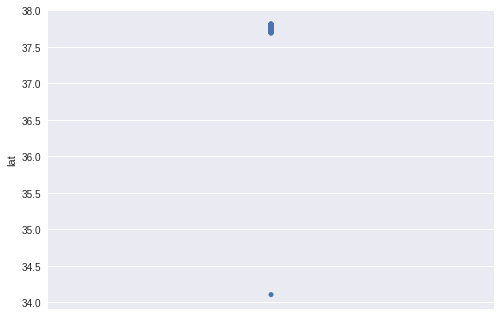

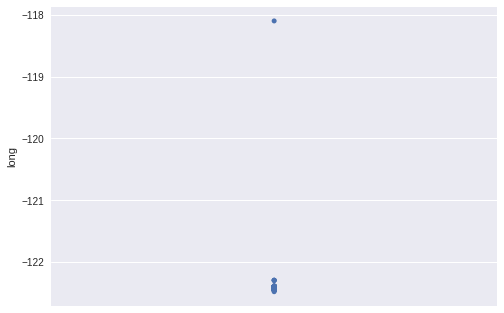

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.stripplot(y='lat',data=pd_employee)
plt.show()
sns.stripplot(y='long',data=pd_employee)
plt.show()

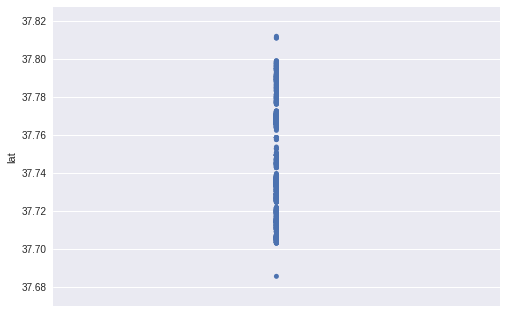

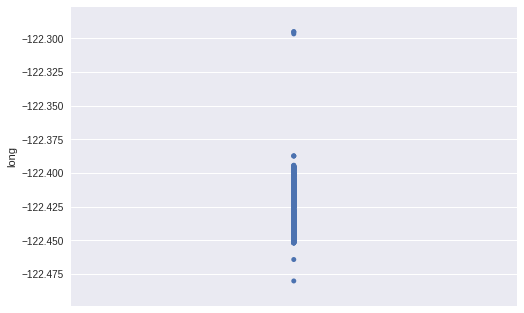

In [25]:
pd_employee = pd_employee[pd_employee.lat>37]
pd_employee = pd_employee[pd_employee.long<-119]
sns.stripplot(y='lat',data=pd_employee)
plt.show()
sns.stripplot(y='long',data=pd_employee)
plt.show()

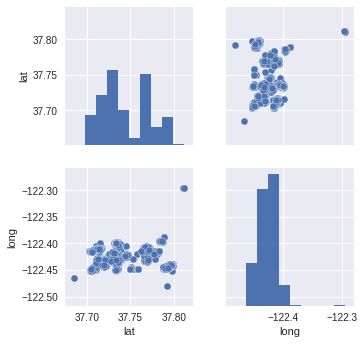

In [26]:
sns.pairplot(data=pd_employee)
plt.show()


In [39]:
busstops = pd.read_csv('Potentail_Bust_Stops.csv')
busstopsArray =[]
def find_location(row):
    intersection_str = "{0} & {1}, {2}".format(row['Street_One'], row['Street_Two'], 'San Francisco, CA, USA')
    intersection_location = geocoder.geocode(intersection_str)
    
    # Add new data
    if intersection_location:
        row['lat'] = intersection_location.latitude;
        row['long'] = intersection_location.longitude;
    
    return row;

pd_busstop = busstops.apply(find_location, axis=1) # axis=1 apply function for each row
pd_busstop

Street_One         Street_Two        lat        long
0    MISSION ST          ITALY AVE  37.718470 -122.439530
1    MISSION ST  NEW MONTGOMERY ST  37.787585 -122.400650
2    MISSION ST            01ST ST  38.400525 -122.354585
3    MISSION ST            20TH ST  37.758410 -122.419025
4    MISSION ST         FREMONT ST  37.790470 -122.396690
5    MISSION ST            13TH ST  37.769985 -122.420050
6    MISSION ST            ERIE ST  37.769070 -122.420040
7    MISSION ST           BEALE ST  37.791090 -122.395755
8    MISSION ST           FAIR AVE  37.745775 -122.419760
9    MISSION ST    SAINT MARYS AVE  37.733845 -122.426360
10   MISSION ST         SENECA AVE  37.717690 -122.440110
11   MISSION ST         ANTHONY ST  37.788270 -122.399470
12   MISSION ST     JESSIE EAST ST  37.783910 -122.405005
13   MISSION ST         SILVER AVE  37.728740 -122.431280
14   MISSION ST   MOUNT VERNON AVE  37.714610 -122.442650
15   MISSION ST            30TH ST  37.742485 -122.421905
16   MISSION ST            MAIN ST  37.791720 -122.395145
17   MISSION ST        TRUMBULL ST  37.730933 -122.428903
18   MISSION ST            15TH ST  37.766670 -122.419820
19   MISSION ST        KINGSTON ST  37.741690 -122.422230
20   MISSION ST         TINGLEY ST  37.728240 -122.431780
21   MISSION ST         THERESA ST  37.727720 -122.432340
22   MISSION ST            PARK ST  37.736680 -122.424215
23   MISSION ST          OLIVER ST  37.709620 -122.450320
24   MISSION ST         STEUART ST  37.793250 -122.393190
25   MISSION ST          HURON AVE  37.708280 -122.454290
26   MISSION ST        SYCAMORE ST  37.762890 -122.419470
27   MISSION ST            02ND ST  38.400525 -122.354585
28   MISSION ST            MINT ST  37.782165 -122.407205
29   MISSION ST         GENEVA AVE  37.716220 -122.441160
..          ...                ...        ...         ...
89   MISSION ST            07TH ST  38.400525 -122.354585
90   MISSION ST          NORTON ST  37.724650 -122.434865
91   MISSION ST            RUTH ST  37.723100 -122.436005
92   MISSION ST         BRAZIL AVE  37.724650 -122.434865
93   MISSION ST      GUTTENBERG ST  37.712715 -122.444685
94   MISSION ST            23RD ST  37.753965 -122.418610
95   MISSION ST         RANDALL ST  37.739613 -122.423797
96   MISSION ST         PERSIA AVE  37.723100 -122.436005
97   MISSION ST            16TH ST  37.765040 -122.419830
98   MISSION ST     YERBA BUENA LN  37.784995 -122.403615
99   MISSION ST           LAURA ST  37.709693 -122.450413
100  MISSION ST            18TH ST  37.761940 -122.419380
101  MISSION ST             LEO ST  37.722460 -122.436510
102  MISSION ST         POWERS AVE  37.746350 -122.419395
103  MISSION ST     SANTA ROSA AVE  37.725760 -122.434010
104  MISSION ST     FLORENTINE AVE  37.713515 -122.443820
105  MISSION ST          FOOTE AVE  37.712715 -122.444685
106  MISSION ST        BOSWORTH ST  37.733810 -122.426280
107  MISSION ST      EXCELSIOR AVE  37.726420 -122.433500
108  MISSION ST        WASHBURN ST  37.775750 -122.415315
109  MISSION ST           MORSE ST  37.710565 -122.447950
110  MISSION ST        ANGELOS ALY  37.773110 -122.418630
111  MISSION ST           BROOK ST  37.740830 -122.422955
112  MISSION ST            09TH ST  38.400525 -122.354585
113  MISSION ST         OTTAWA AVE  37.713495 -122.443845
114  MISSION ST        NIAGARA AVE  37.715710 -122.441620
115  MISSION ST           ACTON ST  37.708800 -122.452760
116  MISSION ST            05TH ST  38.400525 -122.354585
117  MISSION ST            24TH ST  37.752400 -122.418500
118  MISSION ST           GRACE ST  37.775750 -122.415315

[119 rows x 4 columns]

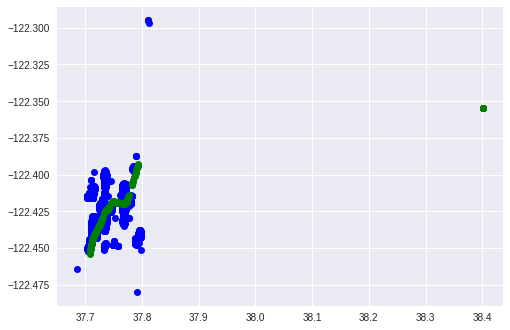

In [41]:
plt.plot(pd_employee.lat,pd_employee.long,'bo')
plt.plot(pd_busstop.lat,pd_busstop.long,'go')
plt.show()


In [42]:
print(pd_busstop.shape)
print(pd_employee.shape)

(119, 4)
(2190, 2)


In [43]:
import math
import numpy as np
pd_busstop['near']=pd.Series(np.zeros(pd_busstop.shape[0]), index=pd_busstop.index)

for index_employee, x in pd_employee.iterrows():
    mind = 999999999
    busstop_index_ofmin = -1
    for index_busstop, m in pd_busstop.iterrows():
        d = math.sqrt((x.lat - m.lat) ** 2 + (x.long - m.long) ** 2)
        if d<mind :
            mind = d
            busstop_index_ofmin=index_busstop
            print(mind)
    pd_busstop.near[busstop_index_ofmin]=pd_busstop.near[busstop_index_ofmin]+1



0.01029495021842243
0.02923270225423859
0.029101849961425248
0.029070342972344215
0.029063193456207018
0.01862130231750248
0.018522962101137012
0.009998296104832351
0.009253242674863276
0.009116161964471708
0.009086633039797721
0.00897388015297417
0.005316361537744992
0.004541288363444938
0.0032065713776533457
0.003106541485311658
0.057831469202825274
0.022161322258906452
0.013120250319681325
0.00480294953464042
0.004272932920622785
0.003539226019493235
0.034253481574867656
0.011332966293075503
0.001881123334606317
0.0016524678514275163
0.015017672922262915
0.005229562601211125
0.0019335201059236208
0.0013737470518593962
0.001270472353112565
0.00045708314342931145
0.012688502669736668
0.008466293462909284
0.003518820825222373
0.003474492768737784
0.06195235829771327
0.020126040518157577
0.01797439446395862
0.00688396846336871
0.005776506204542457
0.0021557496533992563
0.0017039893915354015
0.020506920782992197
0.013639121122717042
0.004313817914560082
0.002057304061138
0.00161824750887

In [44]:
pd_busstop.sort_values('near')

Street_One         Street_Two        lat        long   near
118  MISSION ST           GRACE ST  37.775750 -122.415315    0.0
58   MISSION ST           ANNIE ST  37.786980 -122.401400    0.0
87   MISSION ST           SPEAR ST  37.792560 -122.394070    0.0
27   MISSION ST            02ND ST  38.400525 -122.354585    0.0
28   MISSION ST            MINT ST  37.782165 -122.407205    0.0
86   MISSION ST            MARY ST  37.782165 -122.407205    0.0
30   MISSION ST       CORTLAND AVE  37.740830 -122.422955    0.0
31   MISSION ST            22ND ST  37.755590 -122.418755    0.0
85   MISSION ST            25TH ST  37.750795 -122.418315    0.0
83   MISSION ST             NEY ST  37.729935 -122.430080    0.0
79   MISSION ST            03RD ST  38.400525 -122.354585    0.0
77   MISSION ST     JESSIE WEST ST  37.783140 -122.405975    0.0
36   MISSION ST         ALLISON ST  37.714610 -122.442650    0.0
74   MISSION ST         AVALON AVE  37.727720 -122.432340    0.0
41   MISSION ST            08TH ST  38.400525 -122.354585    0.0
60   MISSION ST        CLARION ALY  37.763240 -122.419490    0.0
44   MISSION ST            19TH ST  37.760400 -122.419235    0.0
117  MISSION ST            24TH ST  37.752400 -122.418500    0.0
89   MISSION ST            07TH ST  38.400525 -122.354585    0.0
92   MISSION ST         BRAZIL AVE  37.724650 -122.434865    0.0
88   MISSION ST           ROLPH ST  37.715610 -122.441700    0.0
112  MISSION ST            09TH ST  38.400525 -122.354585    0.0
1    MISSION ST  NEW MONTGOMERY ST  37.787585 -122.400650    0.0
2    MISSION ST            01ST ST  38.400525 -122.354585    0.0
3    MISSION ST            20TH ST  37.758410 -122.419025    0.0
4    MISSION ST         FREMONT ST  37.790470 -122.396690    0.0
116  MISSION ST            05TH ST  38.400525 -122.354585    0.0
113  MISSION ST         OTTAWA AVE  37.713495 -122.443845    0.0
7    MISSION ST           BEALE ST  37.791090 -122.395755    0.0
93   MISSION ST      GUTTENBERG ST  37.712715 -122.444685    0.0
..          ...                ...        ...         ...    ...
42   MISSION ST            PLUM ST  37.771010 -122.419630   28.0
69   MISSION ST            10TH ST  37.775180 -122.416035   28.0
5    MISSION ST            13TH ST  37.769985 -122.420050   29.0
21   MISSION ST         THERESA ST  37.727720 -122.432340   29.0
8    MISSION ST           FAIR AVE  37.745775 -122.419760   29.0
29   MISSION ST         GENEVA AVE  37.716220 -122.441160   32.0
10   MISSION ST         SENECA AVE  37.717690 -122.440110   32.0
95   MISSION ST         RANDALL ST  37.739613 -122.423797   34.0
55   MISSION ST            29TH ST  37.744215 -122.420830   34.0
13   MISSION ST         SILVER AVE  37.728740 -122.431280   34.0
71   MISSION ST         AMAZON AVE  37.717240 -122.440430   35.0
65   MISSION ST       SAN JUAN AVE  37.723950 -122.435365   38.0
70   MISSION ST       LAWRENCE AVE  37.709485 -122.450700   40.0
91   MISSION ST            RUTH ST  37.723100 -122.436005   40.0
57   MISSION ST       ONONDAGA AVE  37.721150 -122.437500   42.0
38   MISSION ST       VIRGINIA AVE  37.743070 -122.421305   42.0
0    MISSION ST          ITALY AVE  37.718470 -122.439530   46.0
33   MISSION ST        PRECITA AVE  37.746915 -122.419015   50.0
66   MISSION ST            14TH ST  37.768290 -122.419970   52.0
50   MISSION ST            11TH ST  37.774185 -122.416915   52.0
6    MISSION ST            ERIE ST  37.769070 -122.420040   56.0
108  MISSION ST        WASHBURN ST  37.775750 -122.415315   58.0
18   MISSION ST            15TH ST  37.766670 -122.419820   65.0
78   MISSION ST        COLLEGE AVE  37.735235 -122.424575   70.0
62   MISSION ST        ADMIRAL AVE  37.729935 -122.430080   72.0
54   MISSION ST          LASKIE ST  37.776720 -122.414120   85.0
34   MISSION ST            17TH ST  37.763240 -122.419490   92.0
9    MISSION ST    SAINT MARYS AVE  37.733845 -122.426360  102.0
17   MISSION ST        TRUMBULL ST  37.730933 -122.428903  159.0
84   MISSION ST            12TH ST  37.7

In [45]:
pd_busstop[pd_busstop.near>0].near.sum()

2190.0

Tìm danh sách các bus stop gần nhất cho mỗi điểm dân cư . K-means cho danh sách các điểm đó chọn ra 10 center. Rồi tìm các bus stop kế các center này

In [61]:
_address = []

for index , row in pd_busstop[pd_busstop.near>0].iterrows():
  for i in range(0,int(row.near)):
    _address.append(row.tolist())
pd_new_point = pd.DataFrame(_address)
pd_new_point.columns = pd_busstop.columns
pd_new_point.head()

Street_One Street_Two       lat       long  near
0  MISSION ST  ITALY AVE  37.71847 -122.43953  46.0
1  MISSION ST  ITALY AVE  37.71847 -122.43953  46.0
2  MISSION ST  ITALY AVE  37.71847 -122.43953  46.0
3  MISSION ST  ITALY AVE  37.71847 -122.43953  46.0
4  MISSION ST  ITALY AVE  37.71847 -122.43953  46.0

Centers found by scikit-learn:
[[  37.72979907 -122.43014654]
 [  37.7728398  -122.41855296]
 [  37.70971509 -122.45027811]
 [  37.73532484 -122.42529684]
 [  37.7172773  -122.44042649]
 [  37.78951798 -122.39792628]
 [  37.74484814 -122.42037659]
 [  37.76595803 -122.41976298]
 [  37.72308975 -122.43603581]
 [  37.77613883 -122.41483889]]


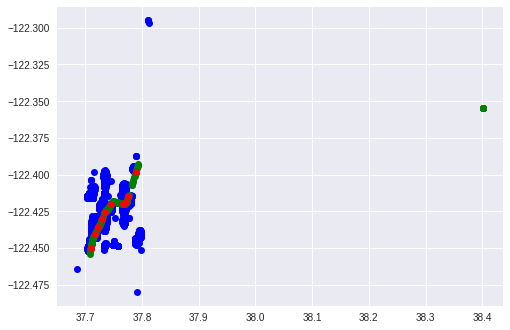

In [65]:
X= pd_new_point[['lat','long']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
centers = kmeans.cluster_centers_
print('Centers found by scikit-learn:')
print(centers)
pred_label = kmeans.predict(X)

plt.plot(pd_employee.lat,pd_employee.long,'bo')
plt.plot(pd_busstop.lat,pd_busstop.long,'go')
plt.plot(centers[:,0],centers[:,1],'ro')
plt.show()


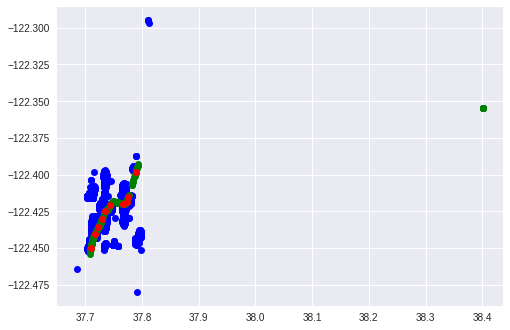

Street_One   Street_Two        lat        long  near
0  MISSION ST  ADMIRAL AVE  37.729935 -122.430080  72.0
1  MISSION ST  ANGELOS ALY  37.773110 -122.418630   3.0
2  MISSION ST    OLIVER ST  37.709620 -122.450320  10.0
3  MISSION ST  COLLEGE AVE  37.735235 -122.424575  70.0
4  MISSION ST   AMAZON AVE  37.717240 -122.440430  35.0
5  MISSION ST     ECKER ST  37.789325 -122.398140  14.0
6  MISSION ST      29TH ST  37.744215 -122.420830  34.0
7  MISSION ST      15TH ST  37.766670 -122.419820  65.0
8  MISSION ST      RUTH ST  37.723100 -122.436005  40.0
9  MISSION ST  WASHBURN ST  37.775750 -122.415315  58.0

In [ ]:
result_busstop = []
for m in centers:
    mind = 999999999
    temp_busstop = None
    for index_busstop, x in pd_new_point.iterrows():
        d = math.sqrt((x.lat - m[0]) ** 2 + (x.long - m[1]) ** 2)
        if d<mind :
            mind = d
            temp_busstop=x.tolist()
    result_busstop.append(temp_busstop)


pd_result_busstop = pd.DataFrame(result_busstop)
pd_result_busstop.columns=pd_new_point.columns
plt.plot(pd_employee.lat,pd_employee.long,'bo')
plt.plot(pd_busstop.lat,pd_busstop.long,'go')
plt.plot(pd_result_busstop.lat,pd_result_busstop.long,'ro')
plt.show()
pd_result_busstop


Dùng k-Medoids với các center được chọn từ danh sách các bus stop . Độ phức tạp O(tKn)